In [1]:
import math

def sample2d(sampleFunction, args, n):
    xy = {'x':[], 'y':[]}
    for i in range(0,n):
        s = sampleFunction(args)
        xy['x'].append(s['x'])
        xy['y'].append(s['y'])
    return xy

In [2]:
import random

def sampleImage(args):
    s = random.random()*args['normalizer']
    x = args['search'](args['iterable'], s)
    return {'x':x['xy'][0], 'y':x['xy'][1], 'pixel':x, 'sample':s, 'normalizer':normalizer}
    
def linear_search(iterable, target):
    for x in iterable:
        if x['cumm'] > target:
            return x
def exponential_search(iterable, target):
    if(iterable[0]['cumm'] >= target):
        return iterable[0]
    start = 1
    while(start< len(iterable) and iterable[start]['cumm'] <= target):
        start = 2*start
    return binary_search_iterative(iterable, target, start//2, min(start, len(iterable)))
    
def binary_search_iterative(iterable, target, start=0, end=-1):
    if end==-1:
        end = len(iterable)
    while (start < end):
        mid = (start + end) // 2
        print(start, mid, end)
        if (iterable[mid]['cumm'] > target):
            end = mid
        else:
            start = mid + 1
    return iterable[end]

In [3]:
def grey(xy):
    xyz = image.getpixel(xy)
    v = 0.299 * xyz[0] + 0.587 * xyz[1] + 0.114 * xyz[2]
    v = v/256
    v= v*v
    
    return {'xy':xy, 'v':v}
def greyImg(image):
    grey_img = []
    for x in range(0, image.size[0]):
        for y in range(0, image.size[1]):
            
            g = grey((x,y))
            #phi = 2*  math.pi * y/image.height
            #g['v']= g['v']*abs(math.sin(phi))
            grey_img.append(g)
    grey_img.sort(key=lambda x: x['v'], reverse=True)
    normalizer = sum([x['v'] for x in grey_img])
    return (grey_img, normalizer)

def greyImgCdf (img):
    grey, normalizer = greyImg(img)
    return (cdf(grey),normalizer)

def cdf(iterable):
    l = []
    res = 0
    for x in iter(iterable):
        res+=x['v']
        l.append({'xy':x['xy'],'v':x['v'], 'cumm':res})
    return l

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import time

In [5]:
# Some time estimation for pictures and algorithms
path = './FullMoon2.png'
n = 10
image = Image.open(path)
showImage = mpimg.imread(path)


grey_img, normalizer = greyImgCdf(image)


In [6]:
algo = linear_search
for x in range(0,2):
    t0 = time.time()
    xy = sample2d(sampleImage, {'search': algo,'iterable':grey_img, 'normalizer':normalizer, 'img':image}, n)
    t = (time.time() - t0)
    with open('./samples.csv', 'a') as out:
        s = ';'.join([path, str(n), str(t),str(algo), str(image.width*image.height)])+'\n'
        out.write(s)

0 1036800 2073600
0 518400 1036800
0 259200 518400
259201 388800 518400
388801 453600 518400
453601 486000 518400
453601 469800 486000
469801 477900 486000
477901 481950 486000
481951 483975 486000
481951 482963 483975
481951 482457 482963
481951 482204 482457
482205 482331 482457
482205 482268 482331
482269 482300 482331
482301 482316 482331
482301 482308 482316
482309 482312 482316
482309 482310 482312
482309 482309 482310
0 1036800 2073600
0 518400 1036800
518401 777600 1036800
777601 907200 1036800
907201 972000 1036800
907201 939600 972000
939601 955800 972000
939601 947700 955800
939601 943650 947700
943651 945675 947700
945676 946688 947700
945676 946182 946688
945676 945929 946182
945676 945802 945929
945676 945739 945802
945740 945771 945802
945772 945787 945802
945772 945779 945787
945772 945775 945779
945776 945777 945779
945778 945778 945779
0 1036800 2073600
1036801 1555200 2073600
1036801 1296000 1555200
1036801 1166400 1296000
1166401 1231200 1296000
1166401 1198800 1231

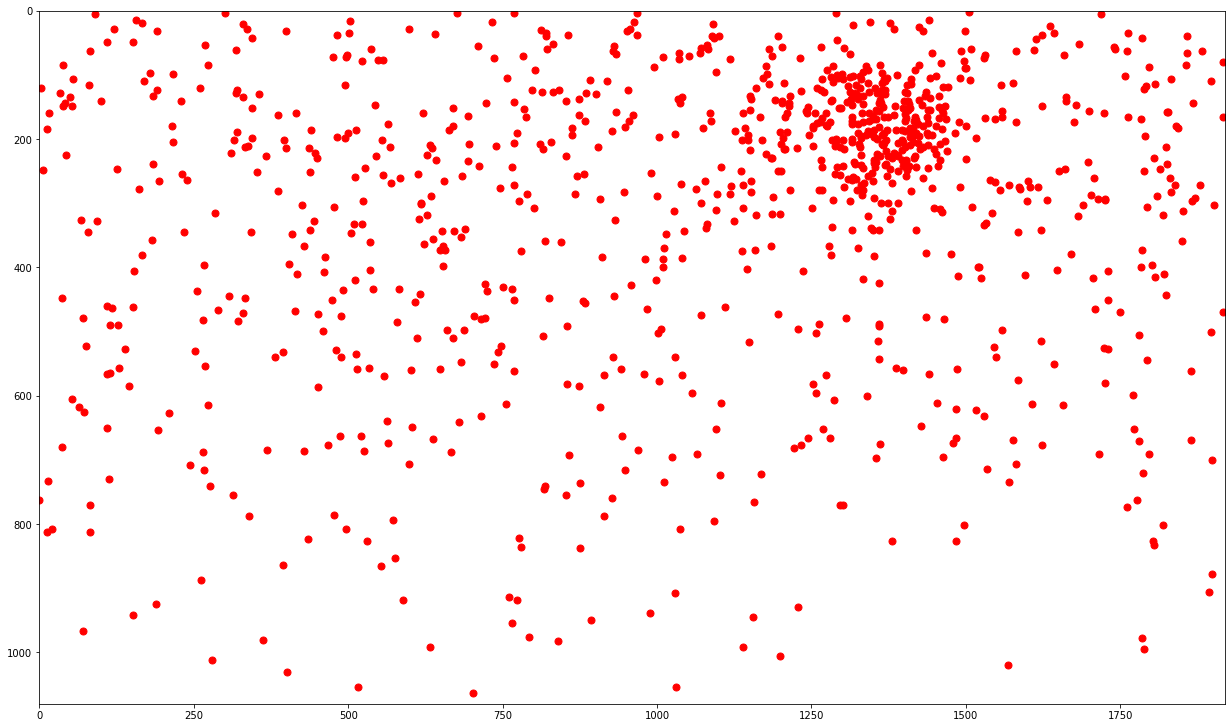

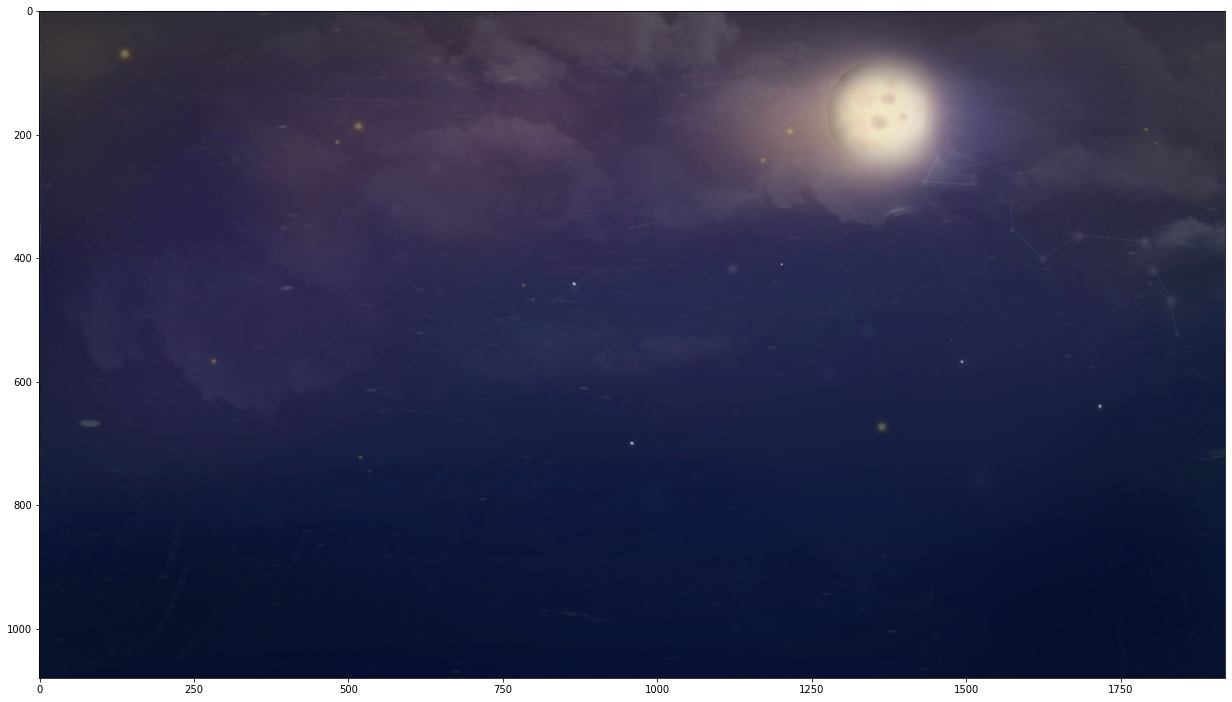

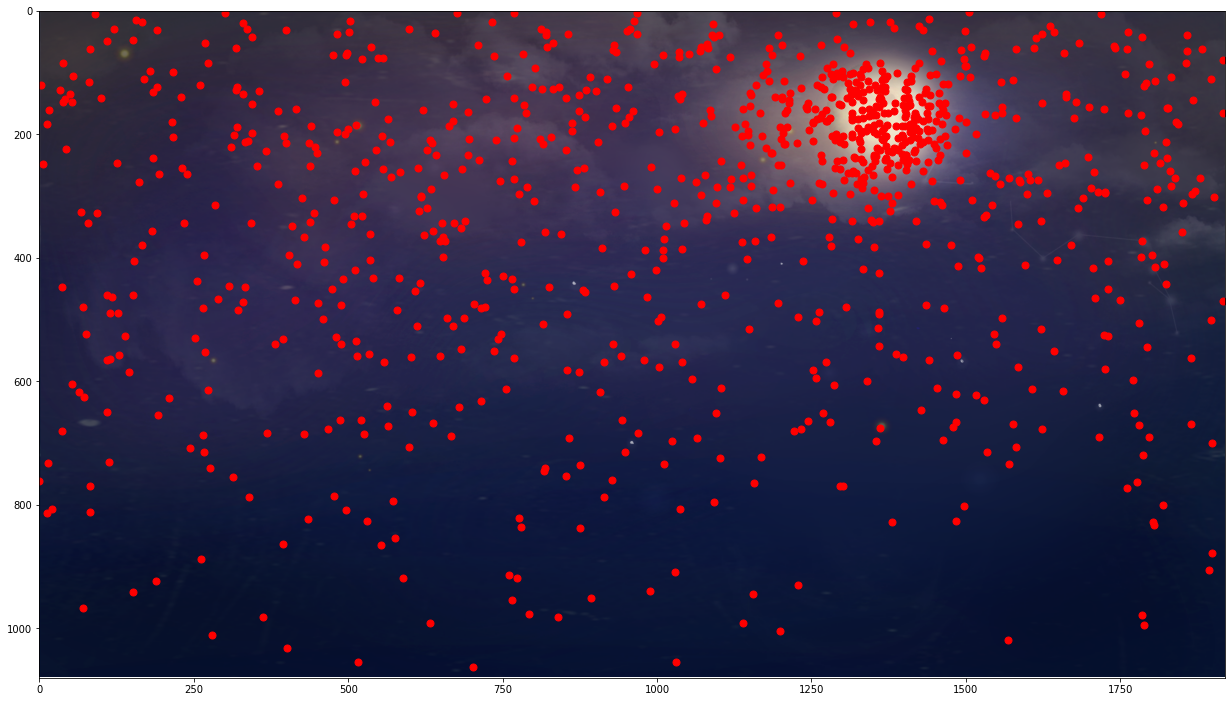

In [7]:
#Visuals for FullMoon

#Sample parameters
path = './FullMoon.png'
n = 1000
#processing
image = Image.open(path)
showImage = mpimg.imread(path)
grey_img, normalizer = greyImgCdf(image)
#sampling
xy = sample2d(sampleImage, {'search': binary_search_iterative,'iterable':grey_img, 'normalizer':normalizer, 'img':image}, n)


ms = 7

#visuals
fig, ax1 = plt.subplots(1, 1, constrained_layout=True)
fig.set_figwidth(17)
fig.set_figheight(10)
#ax1
ax1.set_xlim(0,image.width)
ax1.set_ylim(0,image.height)
ax1.invert_yaxis()
ax1.plot(xy['x'], xy['y'], 'o', color='red', ms=ms )

fig, ax2 = plt.subplots(1, 1, constrained_layout=True)
fig.set_figwidth(17)
fig.set_figheight(10)
#ax2
ax2.imshow(showImage)


fig, ax3 = plt.subplots(1, 1, constrained_layout=True)
fig.set_figwidth(17)
fig.set_figheight(10)
#ax3
ax3.set_xlim(0,image.width)
ax3.set_ylim(0,image.height)
ax3.invert_yaxis()
ax3.plot(xy['x'], xy['y'], 'o', color='red', ms=ms, )
ax3.imshow(showImage, alpha=1)



0 162864 325728
0 81432 162864
0 40716 81432
0 20358 40716
0 10179 20358
10180 15269 20358
10180 12724 15269
10180 11452 12724
11453 12088 12724
12089 12406 12724
12089 12247 12406
12248 12327 12406
12248 12287 12327
12248 12267 12287
12268 12277 12287
12278 12282 12287
12283 12285 12287
12286 12286 12287
0 162864 325728
0 81432 162864
0 40716 81432
0 20358 40716
0 10179 20358
10180 15269 20358
10180 12724 15269
10180 11452 12724
11453 12088 12724
11453 11770 12088
11771 11929 12088
11771 11850 11929
11771 11810 11850
11771 11790 11810
11771 11780 11790
11771 11775 11780
11771 11773 11775
11771 11772 11773
0 162864 325728
0 81432 162864
0 40716 81432
0 20358 40716
0 10179 20358
0 5089 10179
5090 7634 10179
5090 6362 7634
6363 6998 7634
6363 6680 6998
6363 6521 6680
6522 6601 6680
6602 6641 6680
6602 6621 6641
6602 6611 6621
6612 6616 6621
6617 6619 6621
6620 6620 6621
0 162864 325728
0 81432 162864
0 40716 81432
0 20358 40716
0 10179 20358
0 5089 10179
0 2544 5089
0 1272 2544
0 636 127

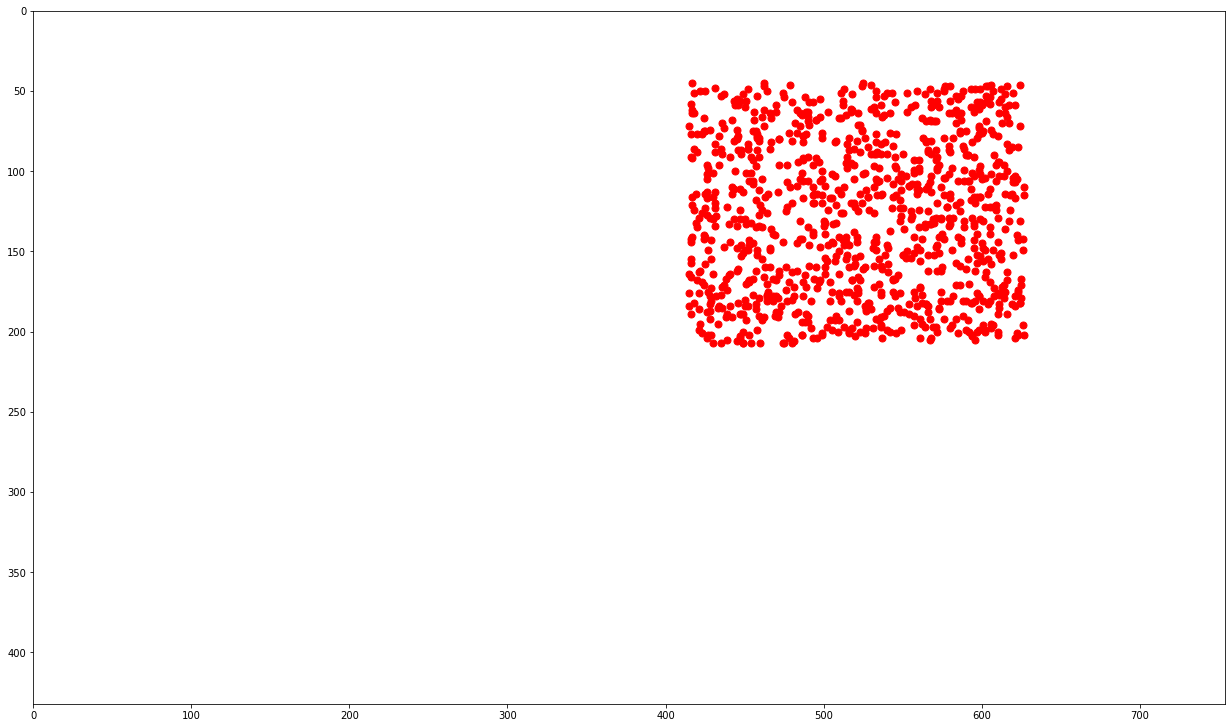

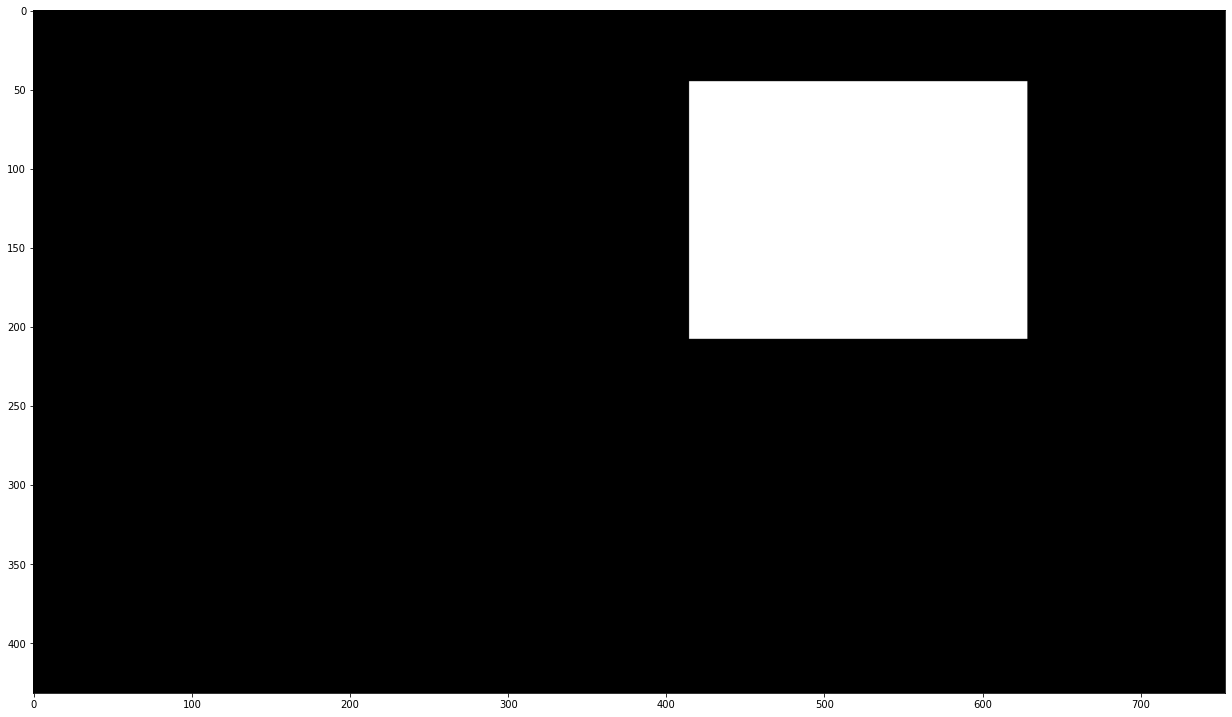

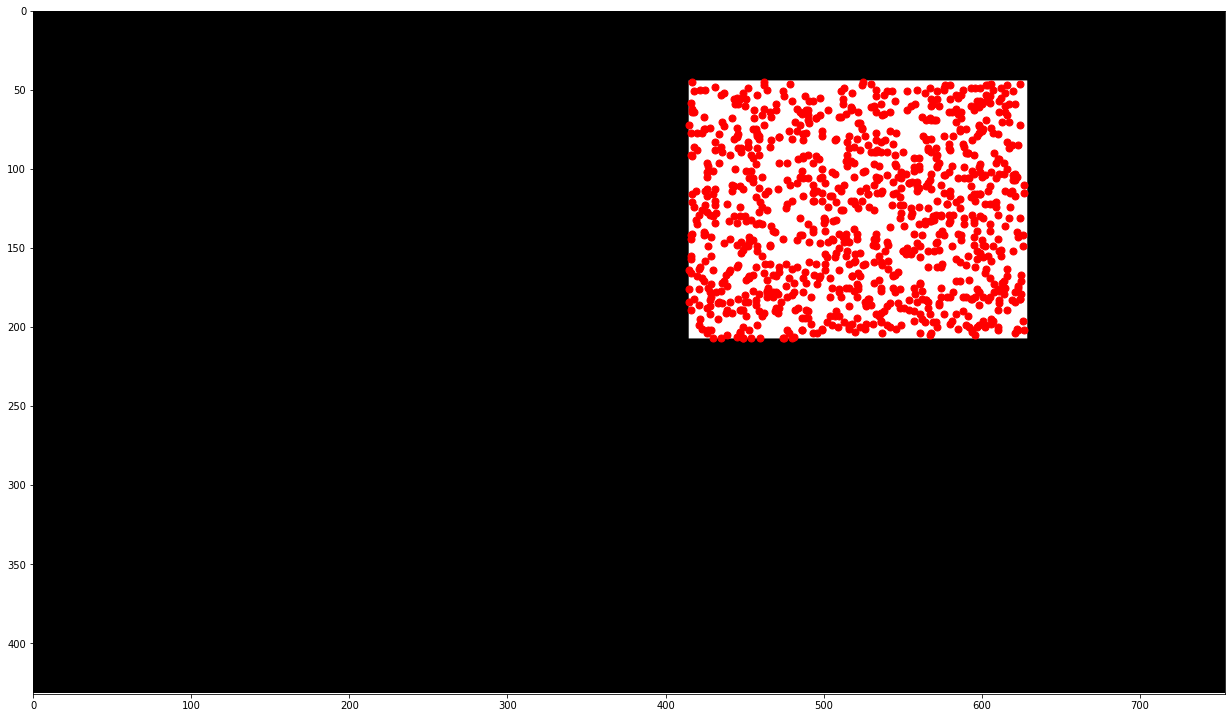

In [8]:
#Visuals for FullMoon3

#Sample parameters
path = './FullMoon3.png'
n = 1000
#processing
image = Image.open(path)
showImage = mpimg.imread(path)
grey_img, normalizer = greyImgCdf(image)
#sampling
xy = sample2d(sampleImage, {'search': binary_search_iterative,'iterable':grey_img, 'normalizer':normalizer, 'img':image}, n)


ms = 7

#visuals
fig, ax1 = plt.subplots(1, 1, constrained_layout=True)
fig.set_figwidth(17)
fig.set_figheight(10)
#ax1
ax1.set_xlim(0,image.width)
ax1.set_ylim(0,image.height)
ax1.invert_yaxis()
ax1.plot(xy['x'], xy['y'], 'o', color='red', ms=ms )

fig, ax2 = plt.subplots(1, 1, constrained_layout=True)
fig.set_figwidth(17)
fig.set_figheight(10)
#ax2
ax2.imshow(showImage)


fig, ax3 = plt.subplots(1, 1, constrained_layout=True)
fig.set_figwidth(17)
fig.set_figheight(10)
#ax3
ax3.set_xlim(0,image.width)
ax3.set_ylim(0,image.height)
ax3.invert_yaxis()
ax3.plot(xy['x'], xy['y'], 'o', color='red', ms=ms, )
ax3.imshow(showImage, alpha=1)



In [9]:
# Aggregates of the data in samples.csv

import pandas as pd

df = pd.read_csv('./samples.csv', delimiter=';')
df.groupby(by=['algorithm','image']).mean()

n  \
algorithm                                          image                         
<function binary_search_iterative at 0x000001B8... ./moonlit_golf_4k.png  1000   
<function binary_search_iterative at 0x000001B8... ./FullMoon.png         1000   
                                                   ./FullMoon3.png        1000   
<function exponential_search at 0x000001B8AD354... ./moonlit_golf_4k.png  1000   
<function exponential_search at 0x000001B8DA0BF... ./FullMoon.png         1000   
                                                   ./FullMoon3.png        1000   
                                                   ./moonlit_golf_4k.png  1000   
<function linear_search at 0x000001B8DA0BF168>     ./FullMoon.png         1000   
                                                   ./FullMoon2.png        1000   
<function linear_search at 0x00000238B50933A8>     ./FullMoon2.png          10   

                                                                               time  \
algorithm                                          image                              
<function binary_search_iterative at 0x000001B8... ./moonlit_golf_4k.png   0.264465   
<function binary_search_iterative at 0x000001B8... ./FullMoon.png          0.024998   
                                                   ./FullMoon3.png         0.027775   
<function exponential_search at 0x000001B8AD354... ./moonlit_golf_4k.png   0.339065   
<function exponential_search at 0x000001B8DA0BF... ./FullMoon.png          0.032050   
                                                   ./FullMoon3.png         0.017238   
                                                   ./moonlit_golf_4k.png   0.583766   
<function linear_search at 0x000001B8DA0BF168>     ./FullMoon.png         39.271539   
                                                   ./FullMoon2.png        19.242558   
<function linear_search at 0x00000238B50933A8>     ./FullMoon2.png         0.112004   

                                                                           pixels  
algorithm                                          image                           
<function binary_search_iterative at 0x000001B8... ./moonlit_golf_4k.png  8388608  
<function binary_search_iterative at 0x000001B8... ./FullMoon.png         2073600  
                                                   ./FullMoon3.png         325728  
<function exponential_search at 0x000001B8AD354... ./moonlit_golf_4k.png  8388608  
<function exponential_search at 0x000001B8DA0BF... ./FullMoon.png         2073600  
                                                   ./FullMoon3.png         325728  
                                                   ./moonlit_golf_4k.png  8388608  
<function linear_search at 0x000001B8DA0BF168>     ./FullMoon.png         2073600  
                                                   ./FullMoon2.png        2073600  
<function linear_search at 0x00000238B50933A8>     ./FullMoon2.png        2073600